# Bayes filter
## Zein Alabedeen Barhoum

# Task

At the beginning of the room there is a mobile robot with coordinate 0. The length of the room is known. The robot moves along one direction in cells 1 meter wide. The actuators of the robot are not ideal, and slippage is also present. As a result, the robot moves to the given cell with a probability of 40%, to the one next to it with a probability of 20%, and 10% through one from it. The histogram of the error is shown below.

The position of the robot is measured by a sensor with a normal error distribution. The mathematical expectation of the sensor readings corresponds to the position of the robot. The sensor error distribution is shown below.

The robot moves to an arbitrarily given cell $N$. Then it measures the position with a sensor and applies a Bayesian filter to refine its position (the robot can request these positions as many times as needed).

**Tasks:**
- Write a function of robot movement.
- Write a program code that simulates a change of the distribution of the probability density of the robot being in the cells after move.
- Implement a function that imitates the measurement of the position of the robot by a sensor.
- Write a function that implements the Bayesian filter to determine the position of the robot.
- Construct a graph of the dependence of the maximum probability of finding a robot in a cell on the number of measurements.
- Plot the probability density distribution of the position of the robot after multiple measurements.
- Repeat the previous two points for three movements at different standard deviations of the sensor readings.

# Solution

### Import Libraries

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### The movement function
This function accepts the cell we want the robot to go to, and it returns the actual new cell of the robot, the error between the required and actual new cell follows the given distribution. 

In [91]:
def move(x):
    rand = np.random.uniform()
    e = 0
    if(rand<0.4):
        e = 0
    elif(rand<0.6):
        e=1
    elif(rand<0.8):
        e=-1
    elif(rand<0.9):
        e=2
    else:
        e=-2
    return x+e

To Test this function, we implement moving to a cell a many times and plot the distribution of the new cell, the distribution should be similar to ```[0.1, 0.2, 0.4, 0.2, 0.1]```

Text(0.5, 1.0, 'probabiltiies of new cells after moving command to cell 5')

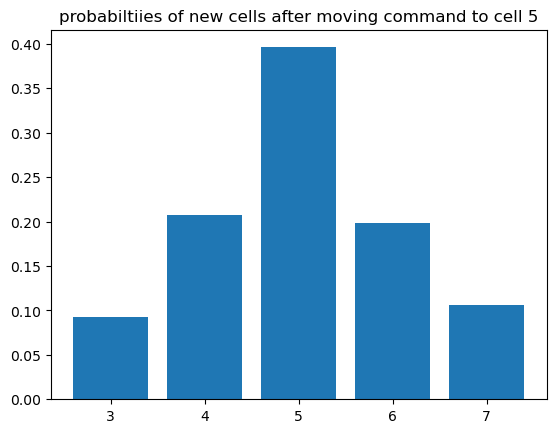

In [92]:
#Test If The movement error is following the correct probabilities
iters = 1000
correct_cell = 5
new_cell_probs={}
for i in range(iters):
    new_cell = move(correct_cell)
    if new_cell not in new_cell_probs:
        new_cell_probs[new_cell]=0  
    new_cell_probs[new_cell]+=1/iters
x,y = zip(*sorted(new_cell_probs.items()))
plt.bar(x,y)
plt.title('probabiltiies of new cells after moving command to cell 5')


### Sensor Imitation
First, a function `measure` receives the actual robot position and the standard deviation `std` of the sensor and gives the measurement.
To test this function we repeat the measurement for `10000` times and record the measurement. The PDF graph of the measurements should follow a normal distribution with the given `std`

<BarContainer object of 100 artists>

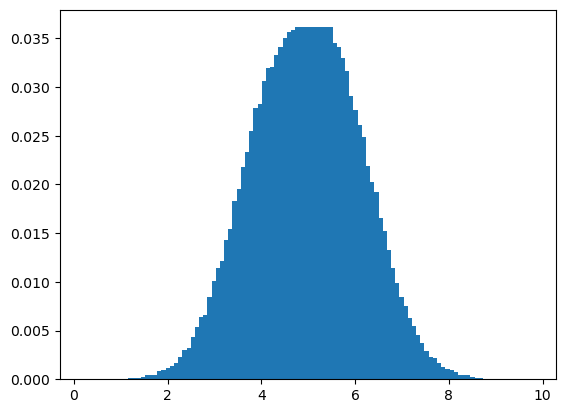

In [93]:
#Function to immitate the measurement
def measure(true_pos, std = 1):
    return (std * np.random.randn() + true_pos)
#Testing the measurement
iters = 100000
true_pos = 5
measurements = []
for i in range(iters):
    measurements.append(measure(true_pos))
p, x = np.histogram(measurements, bins=100)
plt.bar(x[:-1],p/iters)

We see that the resulted PDF follows a normal distribution with standard deviation of 1 (the given `std`)

### Bayes filter:
The function `bayes` accepts the old probability distribution `prior` and one measurement from a sensor with known `std`, the function then returns the new updated probability distribution based on the Bayes filter formula. 

In [94]:
def bayes(prior, measurement,search_area,std):
    numerator = []
    for i in range(len(search_area)):
        numerator.append(prior[i] * norm.pdf(x=measurement, loc=search_area[i], scale=std))
    return numerator/np.sum(numerator)

A function to plot the current probability distribution of the position prediction and the correct prediction

In [95]:
def plot_dist_true(prior,true_position, xmin,xmax, search_area,title=''):
    fig, ax = plt.subplots()
    ax.plot([true_position, true_position], [0, 1],  c='red', alpha=1, label = "robot position")
    ax.plot(search_area, prior, label = "Prior distribution")
    ax.set(xlim=(xmin, xmax), ylim=(0, 2 * np.max(prior)))
    ax.set_xlabel("Search location")
    ax.set_ylabel("robot position probability")
    ax.legend()
    plt.title(title)
    plt.show()

### Testing the Algorithm:
1. Choosing a required position for the robot to move to
2. Call the `move` function to get the true position (only used for measurement and plotting)
3. Initiate the probability distribution for using the `[0.1,0.2,0.4,0.2,0.1]` probabilities
4. Call the `measure` function to get a measurement of the real position
5. Use the measurement and the old distribution to calculate the new distribution
6. Record the maximum probability in the probability distribution
7. Repeat 4, 5 and 6 for the desired number of measurements


#### Test 1: move to: 30, std: 1

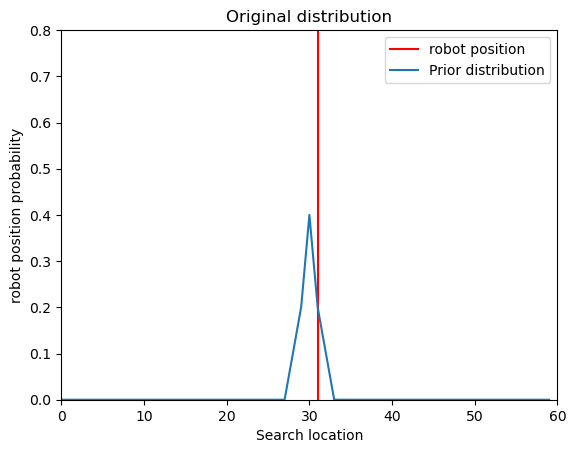

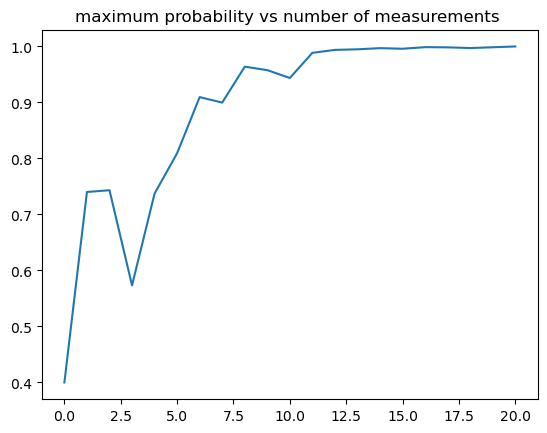

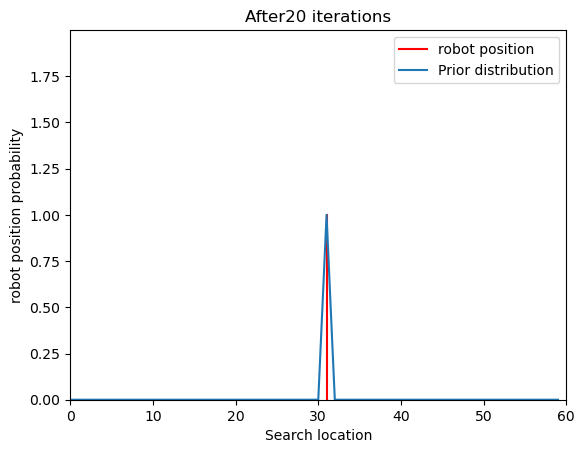

In [96]:
required_position = 30
true_position = move(required_position)

xmin = 0
xmax = 60
dx = 1
search_area = np.arange(xmin,xmax,dx)
prior = [0]*len(search_area)
prior[required_position]=0.4
prior[required_position+1]=0.2
prior[required_position-1]=0.2
prior[required_position+2]=0.1
prior[required_position-2]=0.1

plot_dist_true(prior,true_position, xmin,xmax, search_area,title=f'Original distribution')
std = 1
pdd = prior.copy()
max_prob = [np.max(pdd)]
iters = 20
for i in range(iters):
    meas = measure(true_position)
    pdd = bayes(pdd, meas,search_area, std)
    max_prob.append(np.max(pdd))
plt.plot(max_prob)
plt.title('maximum probability vs number of measurements ')
plt.show()
plot_dist_true(pdd,true_position, xmin,xmax, search_area, title=f'After{iters} iterations')

#### Test 2: move to: 20, std: 5

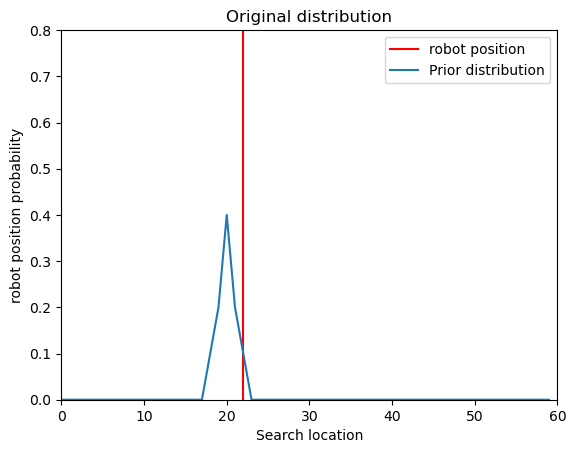

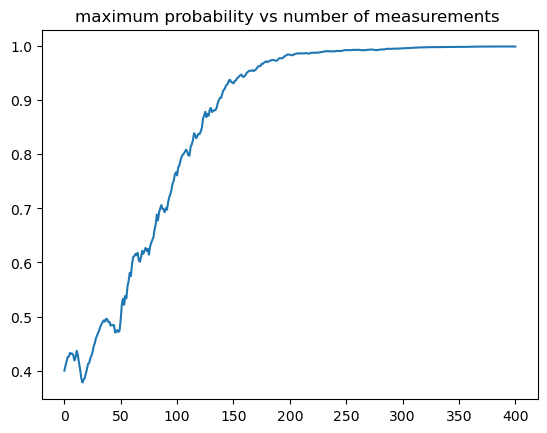

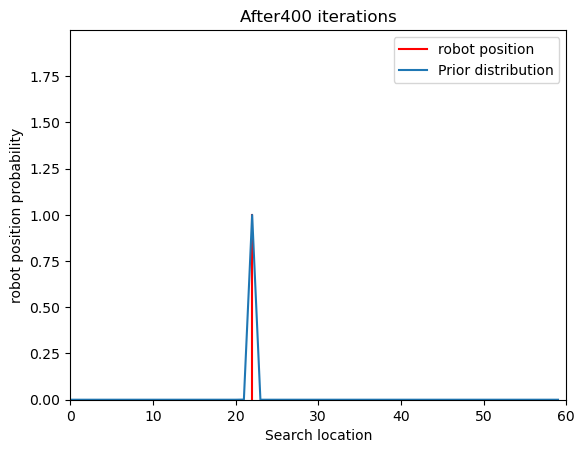

In [97]:
required_position = 20
true_position = move(required_position)

prior = [0]*len(search_area)
prior[required_position]=0.4
prior[required_position+1]=0.2
prior[required_position-1]=0.2
prior[required_position+2]=0.1
prior[required_position-2]=0.1

plot_dist_true(prior,true_position, xmin,xmax, search_area,title=f'Original distribution')

std = 5
pdd = prior.copy()
max_prob = [np.max(pdd)]
iters = 400
for i in range(iters):
    meas = measure(true_position)
    pdd = bayes(pdd, meas,search_area, std)
    max_prob.append(np.max(pdd))
plt.plot(max_prob)
plt.title('maximum probability vs number of measurements ')
plt.show()
plot_dist_true(pdd,true_position, xmin,xmax, search_area, title=f'After{iters} iterations')

#### Test 3: move to: 10, std: 10

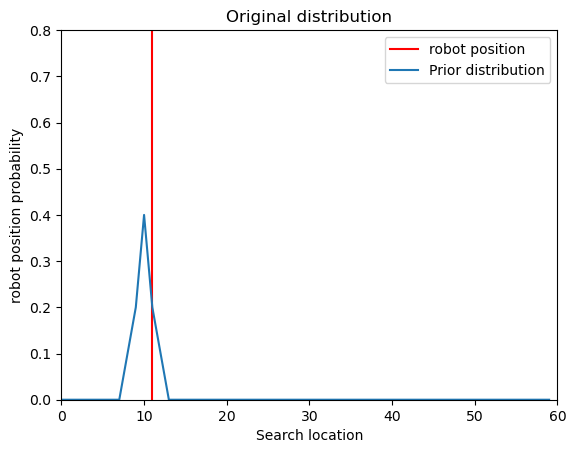

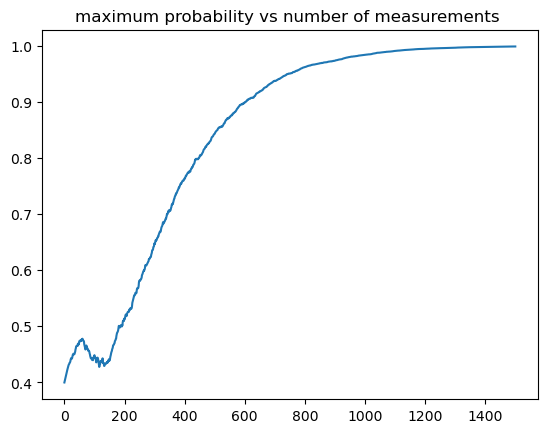

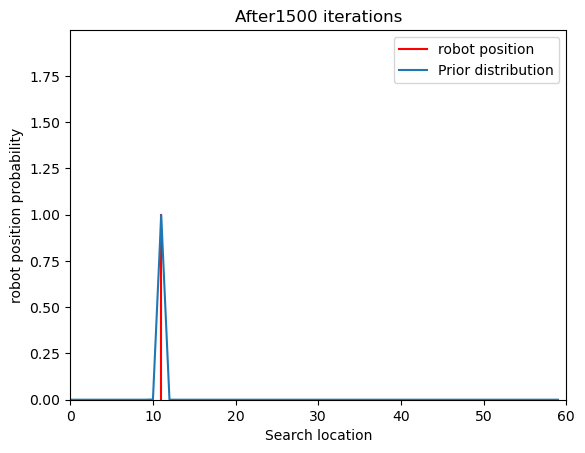

In [98]:
required_position = 10
true_position = move(required_position)

prior = [0]*len(search_area)
prior[required_position]=0.4
prior[required_position+1]=0.2
prior[required_position-1]=0.2
prior[required_position+2]=0.1
prior[required_position-2]=0.1

plot_dist_true(prior,true_position, xmin,xmax, search_area,title=f'Original distribution')

std = 10
pdd = prior.copy()
max_prob = [np.max(pdd)]
iters = 1500
for i in range(iters):
    meas = measure(true_position)
    pdd = bayes(pdd, meas,search_area, std)
    max_prob.append(np.max(pdd))
plt.plot(max_prob)
plt.title('maximum probability vs number of measurements ')
plt.show()
plot_dist_true(pdd,true_position, xmin,xmax, search_area, title=f'After{iters} iterations')